## import resource

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

##1. 데이터 가져오기

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')

## 2. 데이터 기본정보 탐색하기

* datetime: 시간별 날짜 + 타임스탬프  
* season:1 = 봄, 2 = 여름, 3 = 가을, 4 = 겨울 
* hoiday: 휴일
* workingday:근무일 로 간주 되는지 여부 - 날이 주말도 휴일
* weather: 
    1. 맑음, 거의 없음 구름, 약간 흐림, 약간 흐림
    2. 안개 + 흐림, 안개 + 부서진 구름, 안개 + 약간 구름, 안개
    3. 약한 눈, 약한 비 + 뇌우 + 산발적 구름, 가벼운 비 + 산발적인 구름
    4. 큰 비 + 얼음 팔레트 + 뇌우 + 안개, 눈 + 안개 
* temp: 섭씨 온도
* atemp: 체감 온도
* humidity: 습도 - 상대 습도
* windspeed:  풍속
* casual: 등록 된 미등록 사용자 렌탈 횟수
* registerd: 등록 된 사용자 렌탈 시작
* count: 총 렌탈 횟수

In [ ]:
train.info() # 결손값은 없다는 것을 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [ ]:
train.shape, test.shape # 데이터 크기 확인

((10886, 12), (6493, 9))

In [ ]:
train.columns # columns 특성 확인

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [ ]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [ ]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [ ]:
sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


# 3. 데이터전처리

### datetime 변환하기
책에서는 (연도, 월, 일, 시)+ (분, 초)까지 변환했으나
(분,초)의 경우에는 count 와 별다른 특이점이 없다고 판단하여 추후 제거 -> 연도, 월, 일, 시만 분리 작업 실행 + 요일부분도 추가함.

참고) 요일부분 추가한 이유: 시각화하기 위해 추가함.

In [ ]:
from datetime import datetime
import calendar

train['date'] = train['datetime'].apply(lambda x:x.split()[0]) # 날짜 피처 생성

train['year'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[0])
train['month'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[1])
train['day'] = train['datetime'].apply(lambda x:x.split()[0].split('-')[2])
train['hour'] = train['datetime'].apply(lambda x:x.split()[1].split(':')[0])
train['weekday'] = train['date'].apply(lambda dateString: 
    calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])

############ 요일 피처 생성(방식) ###############
print(train['date'][100]) # 날짜
print(datetime.strptime(train['date'][100], '%Y-%m-%d')) # datetime 타입으로 변경
print(datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()) # 정수로 요일 반환
print(calendar.day_name[datetime.strptime(train['date'][100], '%Y-%m-%d').weekday()]) # 문자로 요일 반환

2011-01-05
2011-01-05 00:00:00
2
Wednesday


### season, weather 
season과 weather은 범주형데이터인데 현재 숫자로 표현되어 있어 의미 파악이 힘듦 -> 시각화 시 의미가 잘 드러나도록 문자열로 변환

In [ ]:
train['season'] = train['season'].map({1: 'Spring', 
                                       2: 'Summer', 
                                       3: 'Fall', 
                                       4: 'Winter' })
train['weather'] = train['weather'].map({1: 'Clear', 
                                         2: 'Mist, Few clouds', 
                                         3: 'Light Snow, Rain, Thunder', 
                                         4: 'Heavy Snow, Rain, Thunder'})

In [ ]:
train.head() # 변환된거 확인

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,year,month,day,hour,weekday
0,2011-01-01 00:00:00,Spring,0,0,Clear,9.84,14.395,81,0.0,3,13,16,2011-01-01,2011,01,01,00,Saturday
1,2011-01-01 01:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,8,32,40,2011-01-01,2011,01,01,01,Saturday
2,2011-01-01 02:00:00,Spring,0,0,Clear,9.02,13.635,80,0.0,5,27,32,2011-01-01,2011,01,01,02,Saturday
3,2011-01-01 03:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,3,10,13,2011-01-01,2011,01,01,03,Saturday
4,2011-01-01 04:00:00,Spring,0,0,Clear,9.84,14.395,75,0.0,0,1,1,2011-01-01,2011,01,01,04,Saturday


# 4. 데이터 시각화

In [ ]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 분포도

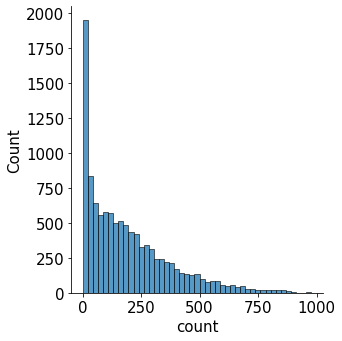

In [ ]:
mpl.rc('font', size=15)      # 폰트 크기 15로 설정 
sns.displot(train['count'])  # 분포도 출력

타깃값인 count의 분포도를 그려봤을 때, log 변환을 하기 전 타깃값이 0부근에 몰려있음. 

-> 왼쪽으로 편향된 그래프의 모양을 보이는데, 회귀 모델이 좋은 성능을 내려면 데이터가 정규분포를 따라야함. 

-> 정규분포 작업 필요(로그변환)

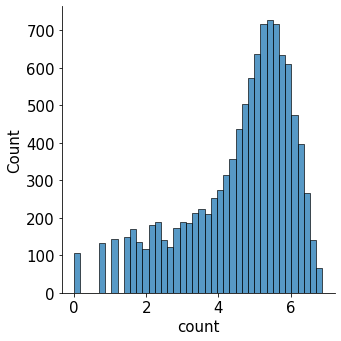

In [ ]:
sns.displot(np.log(train['count']))

★★★★★★★★★★★★★★★★★★★★★★★★★★★★

count를 예측하기보다는 log(count)값을 예측하는  편이 더 정확함

우리도 타깃값을 log(count)로 변환하여 사용해야하며,

마지막에는 꼭 지수변환을 통해 실제 타깃값인 count로 복원해야함.

★★★★★★★★★★★★★★★★★★★★★★★★★★★★★


## 막대그래프

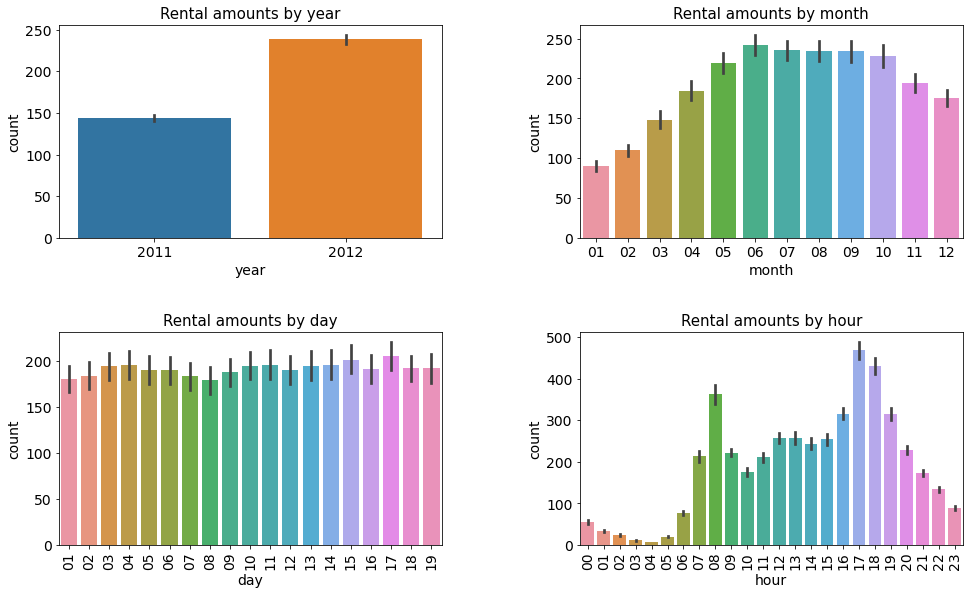

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=14)       # 폰트 크기 설정
mpl.rc('axes', titlesize=15)  # 각 축의 제목 크기 설정
figure, axes = plt.subplots(nrows=2, ncols=2) # 3행 2열 Figure 생성 
plt.tight_layout()            # 그래프 사이에 여백 확보 
figure.set_size_inches(15, 9) # 전체 Figure 크기를 10x9인치로 설정 

# 스텝 2 : 각 축에 서브플롯 할당
# 각 축에 연도, 월, 일, 시간, 분, 초별 평균 대여 수량 막대 그래프 할당
sns.barplot(x='year', y='count', data=train, ax=axes[0, 0])
sns.barplot(x='month', y='count', data=train, ax=axes[0, 1])
sns.barplot(x='day', y='count', data=train, ax=axes[1, 0])
sns.barplot(x='hour', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Rental amounts by year')
axes[0, 1].set(title='Rental amounts by month')
axes[1, 0].set(title='Rental amounts by day')
axes[1, 1].set(title='Rental amounts by hour')

# 3-2 : 1행에 위치한 서브플롯들의 x축 라벨 90도 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[1, 1].tick_params(axis='x', labelrotation=90)

## 박스 플롯

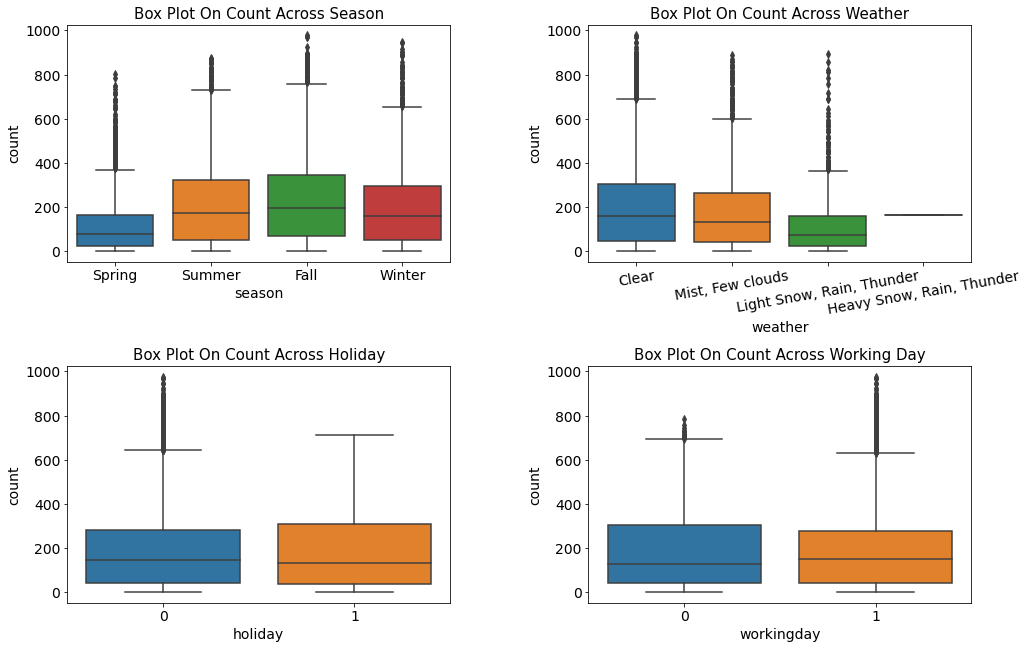

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(15, 10)

# 스텝 2 : 서브플롯 할당
# 계절, 날씨, 공휴일, 근무일별 대여 수량 박스플롯
sns.boxplot(x='season', y='count', data=train, ax=axes[0, 0])
sns.boxplot(x='weather', y='count', data=train, ax=axes[0, 1])
sns.boxplot(x='holiday', y='count', data=train, ax=axes[1, 0])
sns.boxplot(x='workingday', y='count', data=train, ax=axes[1, 1])

# 스텝 3 : 세부 설정
# 3-1 : 서브플롯에 제목 달기
axes[0, 0].set(title='Box Plot On Count Across Season')
axes[0, 1].set(title='Box Plot On Count Across Weather')
axes[1, 0].set(title='Box Plot On Count Across Holiday')
axes[1, 1].set(title='Box Plot On Count Across Working Day')

# 3-2 : x축 라벨 겹침 해결
axes[0, 1].tick_params('x', labelrotation=10) # 10도 회전

## 포인트 플롯

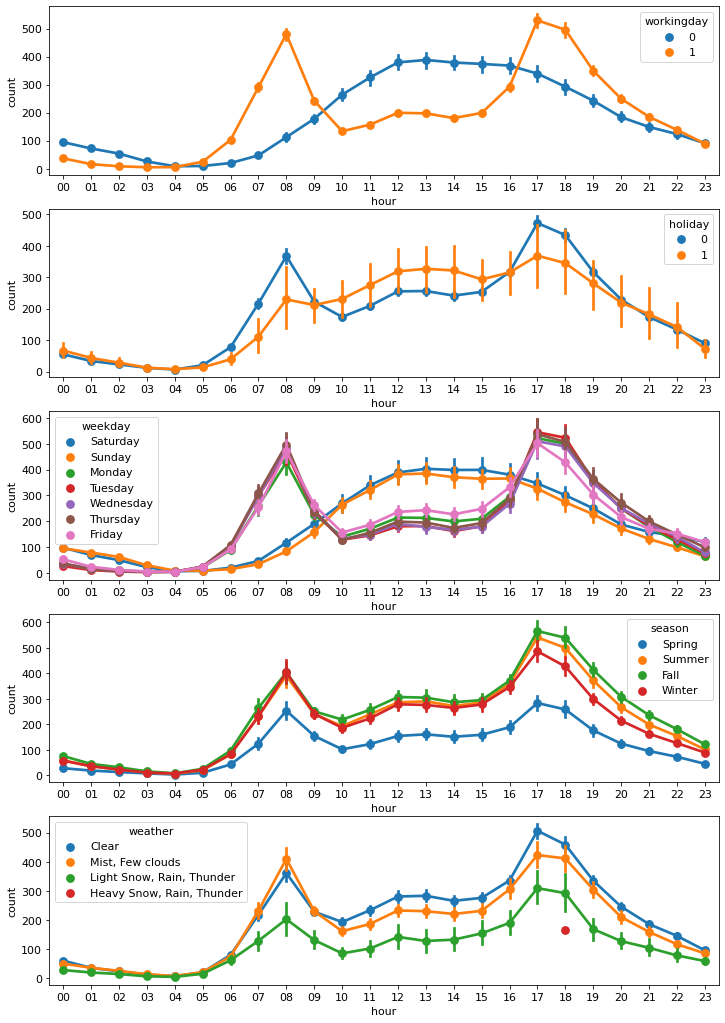

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=11)
figure, axes = plt.subplots(nrows=5) # 5행 1열
figure.set_size_inches(12, 18)

# 스텝 2 : 서브플롯 할당
# 근무일, 공휴일, 요일, 계절, 날씨에 따른 시간대별 평균 대여 수량 포인트플롯
sns.pointplot(x='hour', y='count', data=train, hue='workingday', ax=axes[0])
sns.pointplot(x='hour', y='count', data=train, hue='holiday', ax=axes[1])
sns.pointplot(x='hour', y='count', data=train, hue='weekday', ax=axes[2])
sns.pointplot(x='hour', y='count', data=train, hue='season', ax=axes[3])
sns.pointplot(x='hour', y='count', data=train, hue='weather', ax=axes[4])

weather = 4인 데이터 제거 예정

-> 이상치라고 판단 (실제적으로 제거했을 때 최종 모델 성능이 더 좋았음)

## 산점도(회귀선 포함)

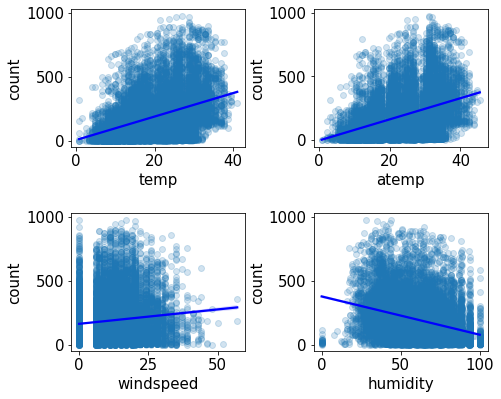

In [ ]:
# 스텝 1 : m행 n열 Figure 준비
mpl.rc('font', size=15)
figure, axes = plt.subplots(nrows=2, ncols=2) # 2행 2열
plt.tight_layout()
figure.set_size_inches(7, 6)

# 스텝 2 : 서브플롯 할당
# 온도, 체감 온도, 풍속, 습도 별 대여 수량 산점도 그래프
sns.regplot(x='temp', y='count', data=train, ax=axes[0, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='atemp', y='count', data=train, ax=axes[0, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='windspeed', y='count', data=train, ax=axes[1, 0], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'})
sns.regplot(x='humidity', y='count', data=train, ax=axes[1, 1], 
            scatter_kws={'alpha': 0.2}, line_kws={'color': 'blue'});

## 히트맵 표현

In [ ]:
train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.984948,-0.064949,-0.017852,0.394454
atemp,0.984948,1.000000,-0.043536,-0.057473,0.389784
humidity,-0.064949,-0.043536,1.000000,-0.318607,-0.317371
windspeed,-0.017852,-0.057473,-0.318607,1.000000,0.101369
count,0.394454,0.389784,-0.317371,0.101369,1.000000


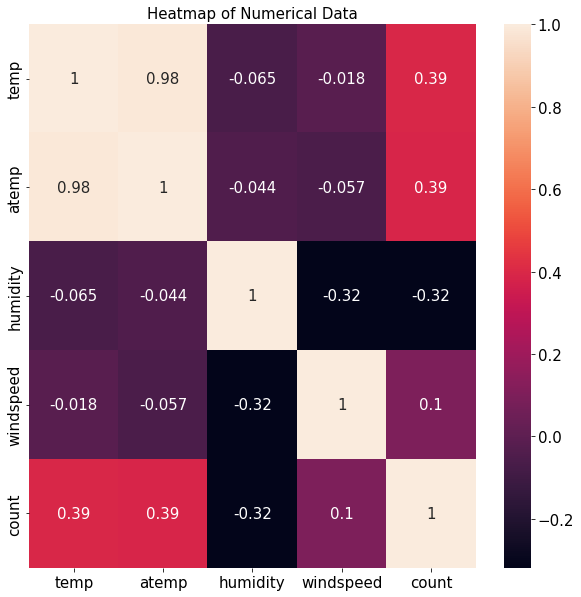

In [ ]:
# 피처 간 상관관계 매트릭스
corrMat = train[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr() 
fig, ax= plt.subplots() 
fig.set_size_inches(10, 10)
sns.heatmap(corrMat, annot=True) # 상관관계 히트맵 그리기
ax.set(title='Heatmap of Numerical Data');

★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

<windspeed의 경우>

산점도로 나타내었을 때, 0인 값이 많고 히트맵으로 count와의 상관정도를 보았을 때 0.1로 연관성이 매우 낮다.

windspeed와 대여수의 상관관계는 파악하기 힘들다고 판단하여 성능을 높이기 위해 featuer 삭제 예정
★★★★★★★★★★★★★★★★★★★★★★★★★★★★★

# 5. feature engineering

In [ ]:
## 데이터 다시 가져오기 
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')

## 이상치 제거

In [ ]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

In [ ]:
sum(train['weather'] == 4)

0

## 데이터 합치기

훈련 데이터와 테스트 데이터에 같은 피쳐엔지니어링을 적용하기 위해 두 데이터를 하나로 합침.

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data
# train shape , test shape = ((10886, 12), (6493, 9)) => 10886+6493 = 17379
# 17379 - 1 (weather = 4인 데이터) = 17378row 도출

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


## 파생변수(피처) 추가

In [ ]:
from datetime import datetime # 분, 초 피처는 생성 하지 않음

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

## 필요 없는 피처 제거

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

1. casual와 registered는 테스트에 없는 데이터이기 때문에 삭제

2. datetime은 index역할이고 date 피처는 year. month, day가 대신할 수 있기 때문에 삭제

3. month의 경우 season으로 데이터 처리가 가능하다고 판단하여 삭제 진행

4. windspeed의 경우 타깃값과 상관관계가 약해서 제거

타깃값을 예측하는 데에 있어서 feature가 많을 경우 오히려 예측 성능이 저하되는 요인으로 작용하기 때문에 상관없는 데이터는 삭제하는 것이 좋다.

★ 다만 정답은 없으니, 탐색적 데이터 분석, 피처중요도, 상관관계 매트릭스를 활용해 종합적으로 판단하도록!

## 데이터 나누기

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])] # count값이 있으면 훈련 데이터
X_test = all_data[pd.isnull(all_data['count'])]   # count값이 없으면 테스트 데이터

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1) # count값은 target값이기 때문에 제거
X_test = X_test.drop(['count'], axis=1)   # count값은 target값이기 때문에 제거

y = train['count'] # 타깃값 따로 저장

In [ ]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


# 평가지표 계산함수 작성

In [ ]:
### RMSLE를 이용해야 하기 때문에 계산함수 작성 ###

import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

* convertExp의 의미: 입력데이터를 지수변환할 지 정하는 파라미터
* convertExp=True: y_true, y_pred를 지수변환하겠다는 것을 의미

        ※ 지수 변환하는 이유: 타깃값으로 count가 아니고 log(count)로 이용하기 때문
        추가 설명) log(count)에 지수변환을 하면 exp()가 씌워지기 때문에 count로 돌아옴

        만약, 타깃값이 정규분포를 따른다면 굳이 log(count)로 안해도 되고, rmsle 값을 계산할 때에도 지수변환이 필요 없음.

* np.nan_to_num: NaN 결측값을 모두 0으로 바꿔주는 기능
* np.log(y+1) -> np.log1p(y)로 쓰기도 함(같은 의미)

# 모델 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg_model = LinearRegression()

In [ ]:
log_y = np.log(y)  # 타깃값 로그변환
linear_reg_model.fit(X_train, log_y) # linear regression 모델에 훈련 진행 

LinearRegression()

## 모델 성능 검증

In [ ]:
preds = linear_reg_model.predict(X_train) # X_train값을 기반으로 타깃값 예측 진행
print (f'선형회귀의 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

선형회귀의 RMSLE 값 : 1.0205


## 예측 및 결과 제출

In [ ]:
linearreg_preds = linear_reg_model.predict(X_test) # 테스트 데이터로 예측

sample['count'] = np.exp(linearreg_preds)    # 지수변환
sample.to_csv('submission.csv', index=False) # 파일로 저장

* 제출결과 평가 점수: 1.02142, 3,242명 中 2773등 
* 상위 85.5% 결과

-> 다른 모델 최적화 기법을 통해 높은 등수로 가보자

# ※ 참고
제출하기 전까지는 test data로 RMSLE를 구할 수 없음.
RMSLE를 구하려면 예측 타깃값과 실제 타깃값이 있어야 하는데 테스트 데이터에는 실제 타깃값이 없기 때문.

이런 경우 보통 훈련 데이터를 훈련용과 검증용으로 나눠서 훈련용 데이터로 모델을 훈련하고 검증용 데이터로는 훈련된 모델의 성능을 평가

추후에 할 예정

# 성능 개선

# 릿지 회귀 모델
: L2규제를 이용한 선형 회귀 모델(성능이 좋은 편은 아니고, 단순 선형회귀모델보다 과대 적합이 적은 모델정도로 생각하기)

RSMLE를 적용했을 때 성능이 좋지 못했기 때문에, 모델 훈련 단계에서 하이퍼파라미터 최적화 방식을 고민해볼 예정.

모델 훈련 단계에서 ☆ 그리드 서치 기법 사용(Grid Search)☆ 

※ grid search 기법이란?
하이퍼 파라미터 적용한 모델마다 교차 검증을 진행 -> 성능 측정 -> 최종적으로 성능이 좋았을 때의 하이퍼파라미터 값을 찾아주는 기법

※ 교차 검증 평가점수는 낮을 수록 좋음.(릿지 모델의 파라미터는 alpha이며 낮을 수록 좋은 성능을 냄.)

## data load 다시 진행 

In [ ]:
## 데이터 다시 가져오기 
train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')
sample = pd.read_csv('/content/drive/MyDrive/sampleSubmission.csv')

## 이상치 제거

In [ ]:
# 훈련 데이터에서 weather가 4가 아닌 데이터만 추출
train = train[train['weather'] != 4]

In [ ]:
sum(train['weather'] == 4)

0

## 데이터 합치기

훈련 데이터와 테스트 데이터에 같은 피쳐엔지니어링을 적용하기 위해 두 데이터를 하나로 합침.

In [ ]:
all_data = pd.concat([train, test], ignore_index=True)
all_data
# train shape , test shape = ((10886, 12), (6493, 9)) => 10886+6493 = 17379
# 17379 - 1 (weather = 4인 데이터) = 17378row 도출

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17373,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17374,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,NaN
17375,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,NaN
17376,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,NaN,NaN,NaN


## 파생변수(피처) 추가

In [ ]:
from datetime import datetime # 분, 초 피처는 생성 하지 않음

# 날짜 피처 생성
all_data['date'] = all_data['datetime'].apply(lambda x: x.split()[0])
# 연도 피처 생성
all_data['year'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[0])
# 월 피처 생성
all_data['month'] = all_data['datetime'].apply(lambda x: x.split()[0].split('-')[1])
# 시 피처 생성
all_data['hour'] = all_data['datetime'].apply(lambda x: x.split()[1].split(':')[0])
# 요일 피처 생성
all_data["weekday"] = all_data['date'].apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())

## 필요 없는 피처 제거

In [ ]:
drop_features = ['casual', 'registered', 'datetime', 'date', 'windspeed', 'month']

all_data = all_data.drop(drop_features, axis=1)

1. casual와 registered는 테스트에 없는 데이터이기 때문에 삭제

2. datetime은 index역할이고 date 피처는 year. month, day가 대신할 수 있기 때문에 삭제

3. month의 경우 season으로 데이터 처리가 가능하다고 판단하여 삭제 진행

4. windspeed의 경우 타깃값과 상관관계가 약해서 제거

타깃값을 예측하는 데에 있어서 feature가 많을 경우 오히려 예측 성능이 저하되는 요인으로 작용하기 때문에 상관없는 데이터는 삭제하는 것이 좋다.

★ 다만 정답은 없으니, 탐색적 데이터 분석, 피처중요도, 상관관계 매트릭스를 활용해 종합적으로 판단하도록!

## 데이터 나누기

In [ ]:
# 훈련 데이터와 테스트 데이터 나누기
X_train = all_data[~pd.isnull(all_data['count'])] # count값이 있으면 훈련 데이터
X_test = all_data[pd.isnull(all_data['count'])]   # count값이 없으면 테스트 데이터

# 타깃값 count 제거
X_train = X_train.drop(['count'], axis=1) # count값은 target값이기 때문에 제거
X_test = X_test.drop(['count'], axis=1)   # count값은 target값이기 때문에 제거

y = train['count'] # 타깃값 따로 저장

In [ ]:
X_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,year,hour,weekday
0,1,0,0,1,9.84,14.395,81,2011,00,5
1,1,0,0,1,9.02,13.635,80,2011,01,5
2,1,0,0,1,9.02,13.635,80,2011,02,5
3,1,0,0,1,9.84,14.395,75,2011,03,5
4,1,0,0,1,9.84,14.395,75,2011,04,5


## 평가지표 계산함수 작성

In [ ]:
### RMSLE를 이용해야 하기 때문에 계산함수 작성 ###

import numpy as np

def rmsle(y_true, y_pred, convertExp=True):
    # 지수변환
    if convertExp:
        y_true = np.exp(y_true)
        y_pred = np.exp(y_pred)
        
    # 로그변환 후 결측값을 0으로 변환
    log_true = np.nan_to_num(np.log(y_true+1))
    log_pred = np.nan_to_num(np.log(y_pred+1))
    
    # RMSLE 계산
    output = np.sqrt(np.mean((log_true - log_pred)**2))
    return output

## 릿지모델 생성

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

ridge_model = Ridge()

### 그리드서치 객체 생성

In [ ]:
# 하이퍼 파라미터 값 목록
ridge_params = {'max_iter':[3000], 'alpha':[0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]}
# alpha 값이 커질 수록 규제 강도가 세지기 때문에 적절한 규제를 사용하면 과대 적합 문제 개선

# 교차 검증용 평가 함수(RMSLE 점수 계산)
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)

# 그리드서치(with 릿지) 객체 생성
gridsearch_ridge_model = GridSearchCV(estimator=ridge_model,   # 릿지 모델(estimator: 분류 및 회귀 모델)
                                      param_grid=ridge_params, # 값 목록
                                      scoring=rmsle_scorer,    # 평가지표
                                      cv=5)                    # 교차검증 분할 수

* 그리드 서치 부분 해석
    - estimator: 분류 및 회귀 모델
    - param_grid: 딕셔너리 형태로 모델의 하이퍼파라미터명과 여러 하이퍼파라미터 값 지정
    - scoring: 사이킷런에서 기본적인 평가지표를 문자열 형태로 제공함. -> matics.make_scorer를 활용해 별도로 만든 평가지표 사용 (교차 검증용 평가 함수)
    - cv: 교차 검증 분할 개수(기본값이 5) 

### 그리드서치 수행

In [ ]:
log_y = np.log(y) # 타깃값 로그변환
gridsearch_ridge_model.fit(X_train, log_y) # 훈련(그리드서치)
print('최적 하이퍼파라미터 :', gridsearch_ridge_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.1, 'max_iter': 3000}


### 성능 검증

In [ ]:
# 예측
preds = gridsearch_ridge_model.best_estimator_.predict(X_train) 

# 평가
print(f'릿지 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}') 

릿지 회귀 RMSLE 값 : 1.0205


성능이 별로 그닥이여서 제출 안함. 다른 모델로 성능 개선해보자

# 라쏘 회귀 모델

* L1 규제를 적용한 선형 회귀 모델
* 릿지 회귀 모델과 마찬가지로 성능이 별로 좋지 못해서 잘 안씀


In [ ]:
from sklearn.linear_model import Lasso

# 모델 생성
lasso_model = Lasso()
# 하이퍼파라미터 값 목록
lasso_alpha = 1/np.array([0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000])
lasso_params = {'max_iter':[3000], 'alpha':lasso_alpha}
# 그리드서치(with 라쏘) 객체 생성
gridsearch_lasso_model = GridSearchCV(estimator=lasso_model,
                                      param_grid=lasso_params,
                                      scoring=rmsle_scorer,
                                      cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_lasso_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_lasso_model.best_params_)

최적 하이퍼파라미터 : {'alpha': 0.00125, 'max_iter': 3000}


In [ ]:
# 예측
preds = gridsearch_lasso_model.best_estimator_.predict(X_train)

# 평가
print(f'라쏘 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

라쏘 회귀 RMSLE 값 : 1.0205


결과 제출 안함(별반 차이 없으니까)

# 랜덤 포레스트 회귀 모델

: 훈련 데이터를 랜덤하게 샘플링한 모델 n개를 각각 훈련하여 결과를 평균하는 방법

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# 모델 생성
randomforest_model = RandomForestRegressor()
# 그리드서치 객체 생성
rf_params = {'random_state':[42], 'n_estimators':[100, 120, 140]}
gridsearch_random_forest_model = GridSearchCV(estimator=randomforest_model,
                                              param_grid=rf_params,
                                              scoring=rmsle_scorer,
                                              cv=5)
# 그리드서치 수행
log_y = np.log(y)
gridsearch_random_forest_model.fit(X_train, log_y)

print('최적 하이퍼파라미터 :', gridsearch_random_forest_model.best_params_)

최적 하이퍼파라미터 : {'n_estimators': 140, 'random_state': 42}


* n_estimators는 랜덤 포레스트를 구성하는 결정 트리 개수 의미

In [ ]:
# 예측
preds = gridsearch_random_forest_model.best_estimator_.predict(X_train)

# 평가
print(f'랜덤 포레스트 회귀 RMSLE 값 : {rmsle(log_y, preds, True):.4f}')

랜덤 포레스트 회귀 RMSLE 값 : 0.1127


4개의 모델 중 가장 성능이 좋은 모델은 랜덤 포레스트. -> 제출 진행

# 예측 및 결과 제출

성능 측정을 훈련 데이터로 했기 때문에 테스트 데이터에서도 성능이 좋다고 보장할 수는 없음. 이번 경진대회의 경우에는 훈련 데이터와 테스트 데이터의 분포가 비슷하여 상대적으로 과대적합 문제가 적게 발생하기 때문에 훈련 데이터에서 성능이 좋다면 테스트 데이터에서도 성능이 좋을 가능성이 큼.

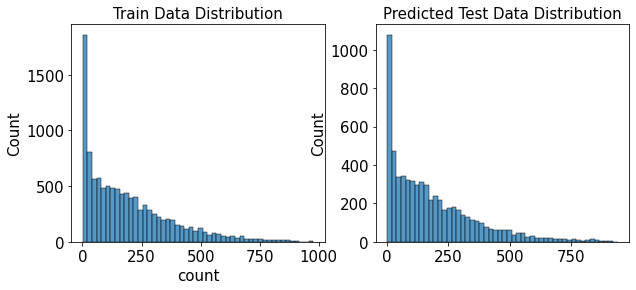

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

randomforest_preds = gridsearch_random_forest_model.best_estimator_.predict(X_test)

figure, axes = plt.subplots(ncols=2)
figure.set_size_inches(10, 4)

sns.histplot(y, bins=50, ax=axes[0])
axes[0].set_title('Train Data Distribution')
sns.histplot(np.exp(randomforest_preds), bins=50, ax=axes[1])
axes[1].set_title('Predicted Test Data Distribution');

룬현데이터 타깃값과 테스트 데이터 타깃 예측값 분포를 통해 비슷함을 확인하고 제출

In [ ]:
sample['count'] = np.exp(randomforest_preds) # 지수변환
sample.to_csv('submission.csv', index=False)

* 제출 평가점수: 0.39567 
* 등수: 193등 
* 상위: 6%

# 참고

**1. season vs month 어느 피쳐 선택할지?**

위에서는 month 피처의 특성이 season에 녹아있다는 이유로 month 피처 삭제.
한번 season 피처 삭제해봤을 경우?

-> RMSLE값: 0.1091
-> PRIVATE 점수 0.45625 (893등)

=> RMSLE값은 좋아지지만, 실제로도 성능이 좋아졌다고 보긴 힘듦.
=> 여기서 구한 RMSLE값을 전적으로 신뢰할 수 없다